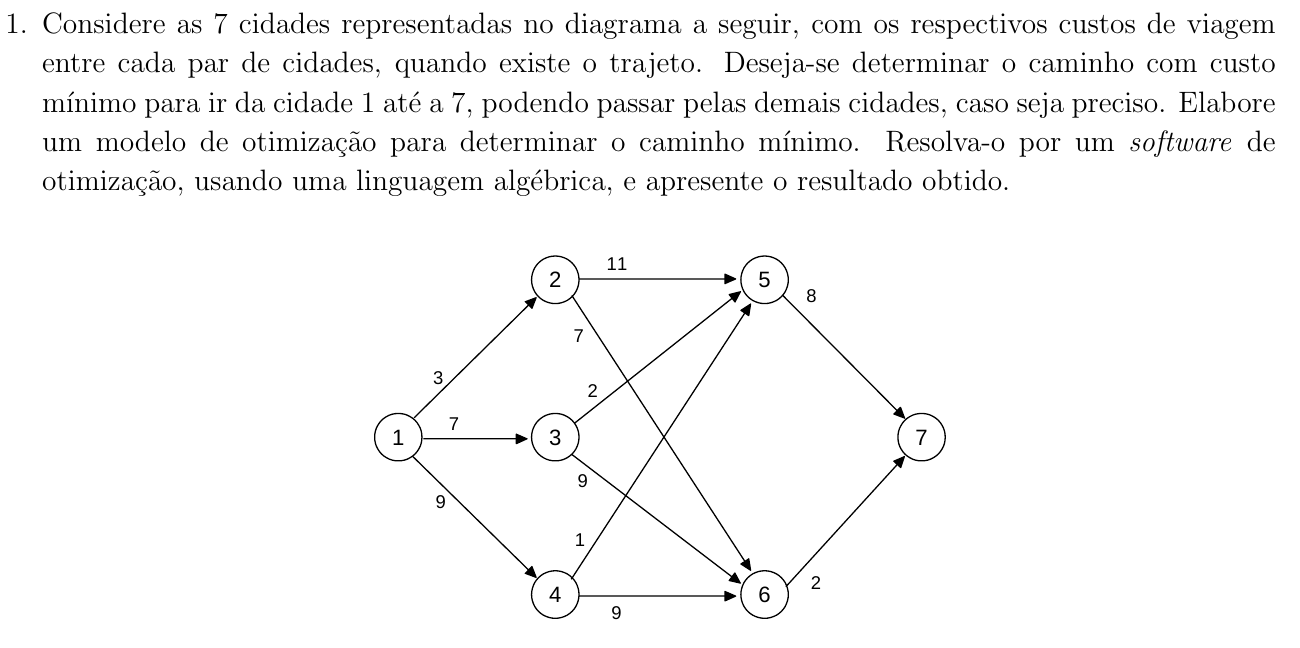

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename='images/1.png')

In [3]:
# Bibliotecas
from pyomo.environ import *
from pyomo.opt import SolverFactory

In [4]:
# Dados
# Conjuntos
Cidades = [i for i in range(1, 8)]
# Parâmetros
custo_i_j = {(1, 2): 3, (1, 3): 7, (1, 4): 9, (2, 5): 11, (2, 6): 7, 
             (3, 5): 2, (3, 6): 9, (4, 5): 1, (4, 6): 9, (5, 7): 8, (6, 7): 2}
precedencia = [(1, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 5), (3, 6), (4, 5), (4, 6), (5, 7), (6, 7)]

In [5]:
# Modelo
model = ConcreteModel()

# Conjuntos
model.I = Set(initialize=Cidades)
I = model.I

# Parâmetros
model.c = Param(I * I, initialize=custo_i_j, within=NonNegativeReals)
c = model.c

# Variáveis de decisão
model.x = Var(I * I, within=Binary)
x = model.x

# Objetivo
model.obj = Objective(expr=sum(sum(c[i, j] * x[i, j] for j in I if (i, j) in precedencia) for i in I))

# Restrições
# Caminho inicia na origem
model.r_origem = ConstraintList()
model.r_origem.add(expr=sum(x[1, j] for j in I if (1, j) in precedencia) == 1)
# Caminho termina na cidade de destino
model.r_destino = ConstraintList()
model.r_destino.add(expr=sum(x[i, 7] for i in I if (i, 7) in precedencia) == 1)
# Entrada = Saída
model.r_fluxo = ConstraintList()
for h in I:
    if h != 1 and h != 7:
        model.r_fluxo.add(expr=sum(x[i, h] for i in I if (i, h) in precedencia
                                  ) == sum(x[h, j] for j in I if (h, j) in precedencia))

# model.pprint()

In [6]:
# Resolução
solver = SolverFactory('glpk')
resultado = solver.solve(model, tee = False)

In [7]:
# Apresentação de resultados
if (resultado.solver.status == SolverStatus.ok) and (resultado.solver.termination_condition != TerminationCondition.infeasible):
    print('Caminho:')
    for par in precedencia:
        i = par[0]
        j = par[1]
        if value(x[i, j]) == 1:
            print('Cidade {} à cidade {}'.format(i, j))
    print()
    print('Custo mínimo: {:.2f}'.format(value(model.obj)))
else:
    print(resultado.solver.termination_condition)

Caminho:
Cidade 1 à cidade 2
Cidade 2 à cidade 6
Cidade 6 à cidade 7

Custo mínimo: 12.00
